# Lab 2 - Algorytmy ewolucyjne

In [13]:

from wsilib.algorithms.evo.evo import  EvoSolver, StopConditions
from wsilib.algorithms.evo.individual import TSPIndividualType, DomainIndividualType
from wsilib.algorithms.evo.genetic_operations import GeneticOperations
from wsilib.algorithms.evo.selection_methods import SelectionMethods
from wsilib.algorithms.evo.succession_metods import SuccessionMethods
from wsilib.utils.function import Function

from src.experiments import generate_cost_function, experiment, params_to_label, avg_f_value, test_sets_generator
from src.plotting import plot_results, plot_cities


## Optymalizacja funkcji kwadratowej

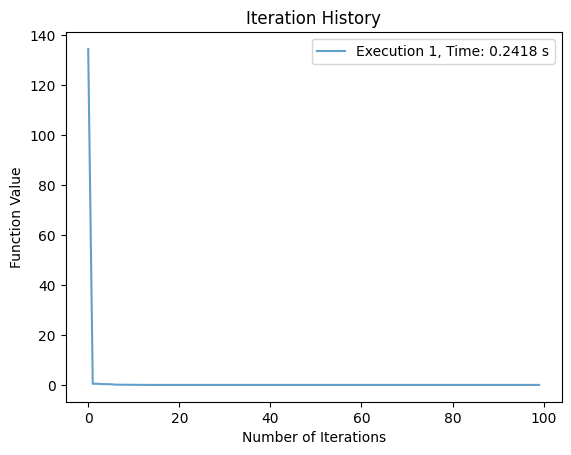

In [14]:
f = Function(
    lambda x: x[0]**2 + x[1]**2,
    dim=2,
)

solver = EvoSolver(
    individual_type=DomainIndividualType(20, (-10, 10)),
    population_size=100,
    selection_method=SelectionMethods.tournament_selection(2),
    genetic_operations=[
        GeneticOperations.mutation(0.1),
        GeneticOperations.single_point_crossover(),
    ],
    succession_method=SuccessionMethods.elitism_succession(1),
    stop_conditions=[
        StopConditions.max_iterations(100),
    ]
)

res = solver.solve(f)
plot_results([res], mean=False)


## Problem komwojażera

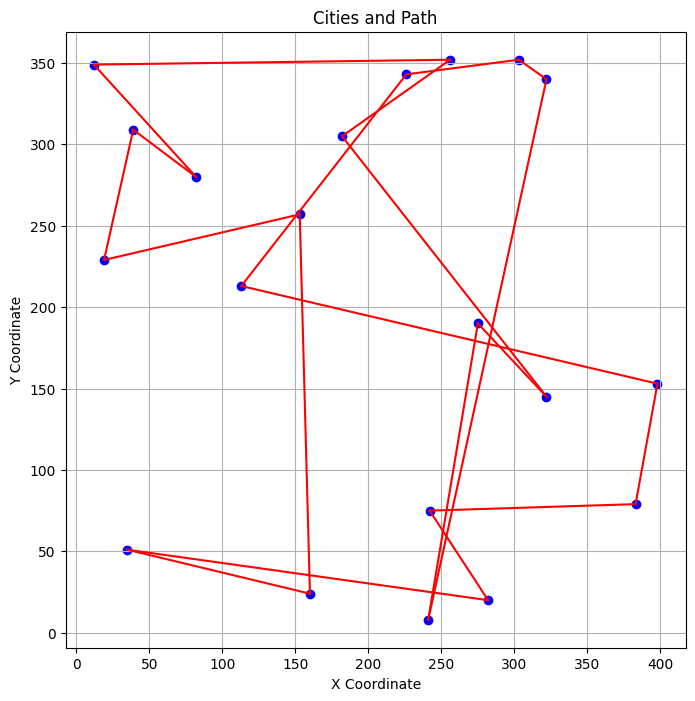

In [15]:

cities = [
    [35, 51],
    [113, 213],
    [82, 280],
    [322, 340],
    [256, 352],
    [160, 24],
    [322, 145],
    [12, 349],
    [282, 20],
    [241, 8],
    [398, 153],
    [182, 305],
    [153, 257],
    [275, 190],
    [242, 75],
    [19, 229],
    [303, 352],
    [39, 309],
    [383, 79],
    [226, 343],
]


solver = EvoSolver(
    individual_type=TSPIndividualType(n_genes=len(cities)),
    population_size=100,
    selection_method=SelectionMethods.tournament_selection(2),
    genetic_operations=[
        GeneticOperations.mutation(0.1),
        GeneticOperations.tsp_crossover(0.5),
    ],
    succession_method=SuccessionMethods.generational_succession(),
    stop_conditions=[
        StopConditions.max_iterations(100),
    ],
)

result = solver.solve(generate_cost_function(cities))
plot_cities(cities, result.x)

## Eksperyment: szukanie optymalnych hiperparametrów dla problemu komwojażera

1/24
Params:
    population_size: 10
    selection_method: tournament_selection(2)
    genetic_operations:
        mutation
    succession_method: generational_succession
    stop_conditions:
        max_iterations(1000)



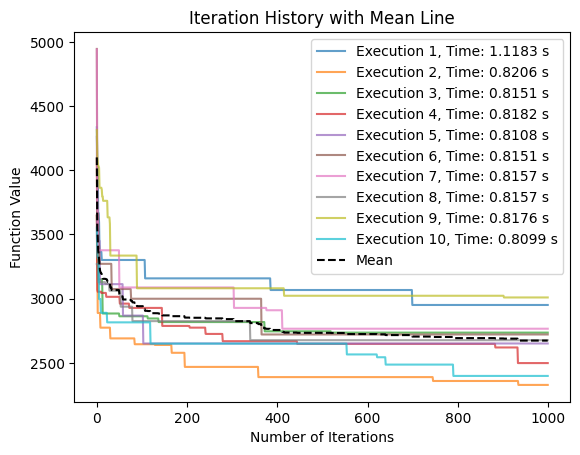

KeyboardInterrupt: 

In [16]:
exp = experiment(params={
    'population_size': [10, 100],
    'selection_method': [SelectionMethods.tournament_selection(2), SelectionMethods.tournament_selection(5)],
    'genetic_operations': [
        [
            GeneticOperations.mutation()
        ],
        [
            GeneticOperations.mutation(),
            GeneticOperations.tsp_crossover(0.5),
        ],
        [
            GeneticOperations.mutation(),
            GeneticOperations.tsp_crossover(0.7),
        ]
    ],
    'succession_method': [SuccessionMethods.generational_succession(), SuccessionMethods.elitism_succession(1)],
    'stop_conditions': [
        StopConditions.max_iterations(1000),
    ],
}, n_sets=10)

best = (None, None, None, None)
for params, results, progress in exp:
    label = params_to_label(params)
    print(progress)
    print(label)
    plot_results(results)
    if(best == (None, None, None, None)):
        best = (avg_f_value(results), label, results, params)
    else:
        if(avg_f_value(results) < best[0]):
            best = (avg_f_value(results), label, results, params)
            
print("Best config:")
print(best[1])
plot_results(best[2])
print("Średnia wartość funkcji kosztu: " + str(best[0]))
best_params = best[3]
        


## Problem komwojażera na zoptimizowanym algorytmie ewolucyjnym

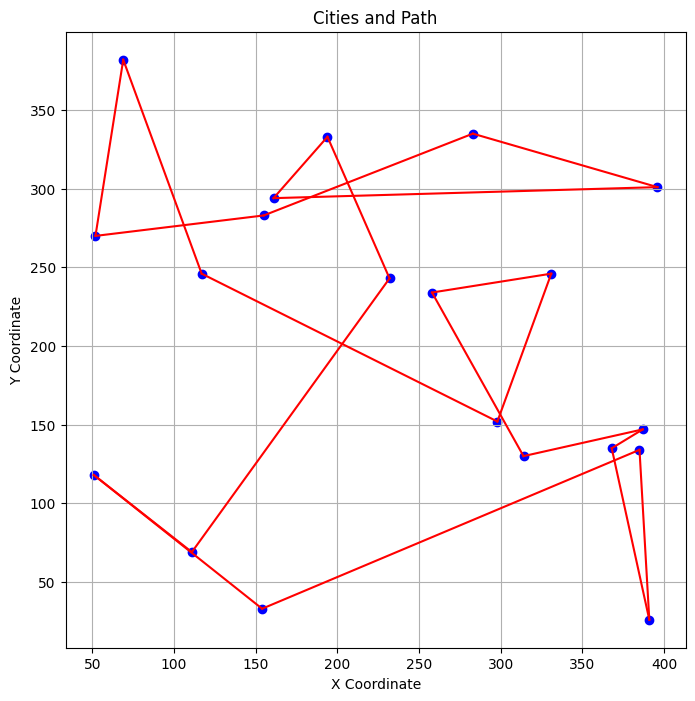

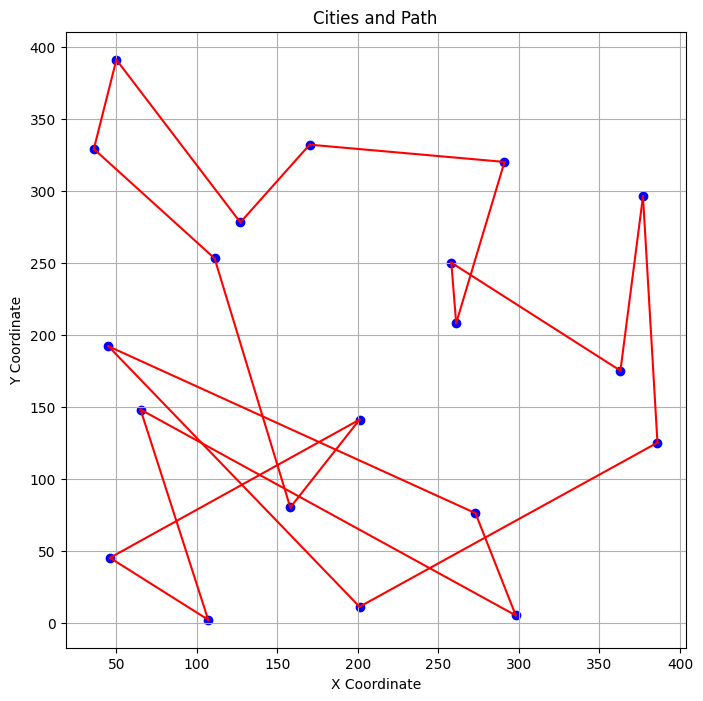

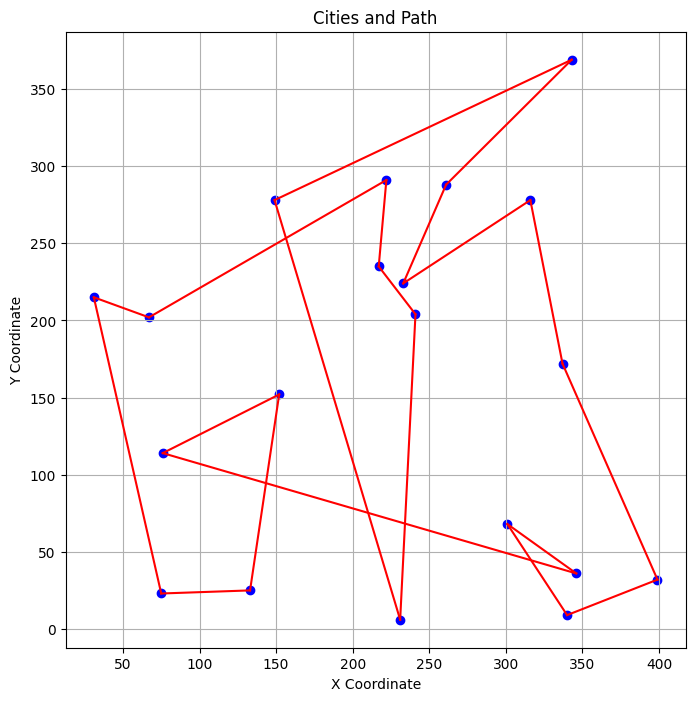

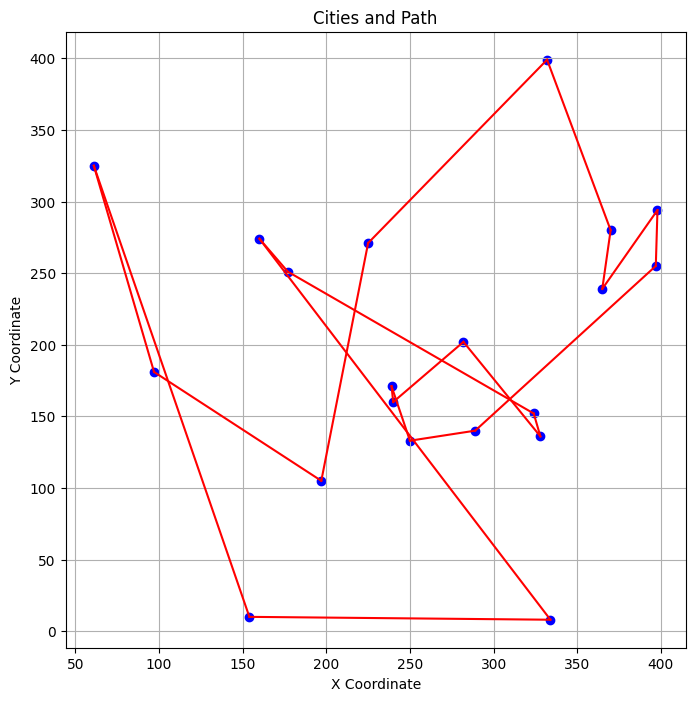

In [ ]:
solver_opt = EvoSolver(
    individual_type=TSPIndividualType(n_genes=len(cities)),
    population_size=best_params['population_size'],
    selection_method=best_params['selection_method'],
    genetic_operations=best_params['genetic_operations'],
    succession_method=best_params['succession_method'],
    stop_conditions=best_params['stop_conditions'],
)

for cities2 in test_sets_generator(4):
    result = solver_opt.solve(generate_cost_function(cities2))
    plot_cities(cities2, result.x)

## Wnioski
- Większy rozmiar populacji daje lepsze wyniki - lepsza zdolność eksploracyjna algorytmu
- Selekcja turniejowa dla par daje podobne wyniki co dla grup 5 elementowych.
- Zastosowanie mutacji oraz krzyżowania daje najlepsze wyniki.
- Krzyżowanie najlepiej wykonywać z parametrem `alpha=0.5` czyli dzielić osobnika na dwie równe części
- Lepszą metoda sukcesji okazała się być sukcesja generacyjna - prawdopodobnie zwiększa to zdolność eksploracyjną algorytmu

